In [1]:
import numpy as np  
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load data
dataset = pd.read_csv('banana_data.csv', header = None )
dataset.head()

,0,1,2
0,-1.0,-3.089839,-0.831686
1,-1.0,-2.980834,-0.159575
2,-1.0,-2.836057,-0.177081
3,-1.0,-2.767849,0.096217
4,-1.0,-2.600350,0.216772


In [3]:
# split data to train and test data
X_Data = dataset[[1,2]].values
Y_Data = dataset[0].values

X_train, X_test, Y_train, Y_test = train_test_split(X_Data, 
                                                    Y_Data,
                                                    test_size = 0.2,
                                                    random_state=1)

print("Size of Train Data {}".format(X_Data.shape))
print("Size of Test Data {}".format(X_test.shape))

Size of Train Data (5300, 2)
Size of Test Data (1060, 2)


In [4]:
# Testing the performance for one DecisionTreeClassifier

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
print("One Decision Tree accracy: {}".format(accuracy_score(Y_test, y_predict)))

One Decision Tree accracy: 0.8084905660377358


In [5]:
# Implement Adaboost algorithm

#setting init  
num_sample = X_train.shape[0]
num_iterations = 10

estimators_list = []
alpha_list = []
estimators_accuracy = []

# init the data_weight 
data_weight_list = np.ones(num_sample)
data_weight_list.fill(1/num_sample)

# data_weight_list is the list use to change the data weight
# at each iteration, we will calculte e1 (sum of the error data's weight)
# use e1 to calculate alpha and update the data weight

for i in range(num_iterations):
    
    # assign a new estimator
    estimator = tree.DecisionTreeClassifier(max_depth=3)
    
    # training our estimator 
    estimator.fit(X_train, Y_train, sample_weight = data_weight_list)
    
    #predict result and calculate accuacy of current estimator
    pred = estimator.predict(X_train)
    acc = accuracy_score(Y_train, pred)
    
    #save the current accuacy 
    estimators_accuracy.append(acc)
    print("current estimator accuracy: {0:5f}".format(acc))
    
    # calculate the err value
    tot_err_weight = 0
    for i in range(num_sample):
        if pred[i] != Y_train[i]:
            tot_err_weight += data_weight_list[i]
    
    
    # calculate alpha (the weight for estimator)
    alpha = (np.log((1 - tot_err_weight)/tot_err_weight)) / 2

    
    # Update data weight
    data_weight_list = data_weight_list * np.exp(- alpha * Y_train * pred)
    data_weight_list = data_weight_list / data_weight_list.sum()


    # save alppha and estimators
    estimators_list.append(estimator)
    alpha_list.append(alpha)



current estimator accuracy: 0.814387
current estimator accuracy: 0.657311
current estimator accuracy: 0.662736
current estimator accuracy: 0.576179
current estimator accuracy: 0.712736
current estimator accuracy: 0.643632
current estimator accuracy: 0.635613
current estimator accuracy: 0.626887
current estimator accuracy: 0.475472
current estimator accuracy: 0.629481


In [11]:
# calculate test error and train error at each iteration
num_iterations = 10
num_sample = X_test.shape[0]

train_err_rate = []
test_err_rate = []

# We use the alpha and estimator to calculate test error and train error

# Y_out (predict result) = sign(  sum(alpha[0] * estimator[0] + .... alpha[i] * estimator[i])

# which i stand for each iteration

# calculate testing err
for i in range(1, num_iterations+1):
    
    Y_out = np.zeros(X_test.shape[0])
    for j in range(i):
        Y_out = Y_out + alpha_list[j] * estimators_list[j].predict(X_test)
    Y_out = np.sign(Y_out)
    test_err_rate.append(accuracy_score(Y_test, Y_out))
    print("Round {0:2d}  test err: {1:5f}".format(i ,accuracy_score(Y_test, Y_out)))

print()

# calculate training err
for i in range(1, num_iterations+1):
    Y_out = np.zeros(X_train.shape[0])
    for j in range(i):
        Y_out = Y_out + alpha_list[j] * estimators_list[j].predict(X_train)
    Y_out = np.sign(Y_out)
    
    train_err_rate.append(accuracy_score(Y_train, Y_out))
    print("Round {0:2d} train err: {1:5f}".format(i ,accuracy_score(Y_train, Y_out)))

Round  1  test err: 0.808491
Round  2  test err: 0.808491
Round  3  test err: 0.844340
Round  4  test err: 0.847170
Round  5  test err: 0.848113
Round  6  test err: 0.850000
Round  7  test err: 0.878302
Round  8  test err: 0.859434
Round  9  test err: 0.891509
Round 10  test err: 0.881132

Round  1 train err: 0.814387
Round  2 train err: 0.814387
Round  3 train err: 0.847877
Round  4 train err: 0.845519
Round  5 train err: 0.856840
Round  6 train err: 0.854481
Round  7 train err: 0.872170
Round  8 train err: 0.855189
Round  9 train err: 0.883255
Round 10 train err: 0.875943


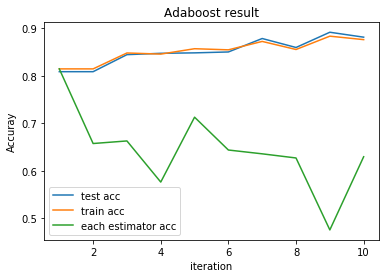

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xlst = list(range(1, 11))

    
plt.plot(xlst, test_err_rate, label='test acc')
plt.plot(xlst, train_err_rate, label='train acc')
plt.plot(xlst, estimators_accuracy, label='each estimator acc')

plt.ylabel("Accuray")
plt.xlabel("iteration")
plt.title("Adaboost result")
plt.legend(loc='lower left')


plt.show()